<a href="https://colab.research.google.com/github/Arthur2303/Circuitos-Eletricos-I/blob/main/CE_ListaQuest%C3%A3o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

Cloning into 'ElectricCircuits'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1020 (delta 1), reused 3 (delta 0), pack-reused 1013
Receiving objects: 100% (1020/1020), 130.90 MiB | 19.44 MiB/s, done.
Resolving deltas: 100% (586/586), done.
Checking out files: 100% (318/318), done.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from utils import round_expr, symdisp, symplot

from sympy.polys.partfrac import apart

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

sp.init_printing()

#### Definindo algumas variáveis simbólicas de interesse

In [80]:
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega, t = sp.symbols('omega, t', real=True)
infty = sp.oo

### Problema 1

Sendo $R_1$= 1 $\Omega$, $R_2$ = 8 $\Omega$ e $R_3$ = 10 $\Omega$.

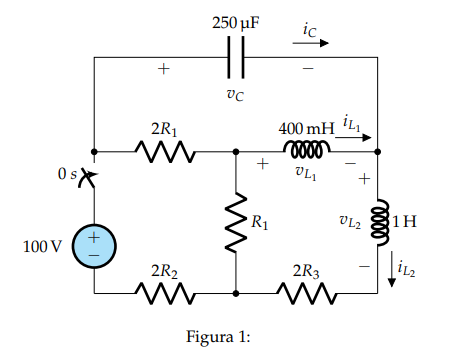 

c. Determine $V_{C}(s)$, $I_{L_1}(s)$ e $I_{L_2}(s)$ pelo método das tensões de nó.

d. Determine $V_{C}(s)$, $I_{L_1}(s)$ e $I_{L_2}(s)$ pelo método das correntes de malha e verifique a consistência com os resultados do item (c).

e. Determine $v_C(t)$, $i_{L_1}(t)$ e $i_{L_2}(t)$, para t $\geq$ $0^+$.

f. Gere of gráficos das curvas das funções obtidas no item d.

g. Simule o Circuito da figura no falstad e compare as curvas observadas com os resultados obtidos no item d. Compare em termos de valores finais e valores de pico das grandezas.

c. Determinando $V_A(s)$, $V_B(s)$ e $V_C(s)$ pelo método das tensões de nó:

In [7]:
VA, VB, VC, I_L1, I_L2,s = sp.symbols('V_A, V_B, V_C, I_L_1, I_L_2, s')

# define os sistema de equações
eq1 = sp.Eq((VA-(10/s)-VC)/(4000/s) + (VA-VB)/2, (-VA+(100/s))/16)             
eq2 = sp.Eq(VB + (VB-VC)/(0.4*s), (VA-VB)/2)  
eq3 = sp.Eq((VA-(10/s)-VC)/(4000/s) + (VB-VC)/(0.4*s), (VC+1)/(20+s))

# resolve o sistema
soluc = sp.solve([eq1, eq2,eq3],[VA, VB, VC], dict=True)
soluc

VA = [sol[VA] for sol in soluc]
VB = [sol[VB] for sol in soluc]
VC = [sol[VC] for sol in soluc]

VA = VA[0]
VB = VB[0]
VC = VC[0]

print('Tensões dos nós no domínio de Laplace: \n')
symdisp('V_A(s) =', VA, 'Vs')
symdisp('V_B(s) =', VB, 'Vs')
symdisp('V_C(s) =', VC, 'Vs')

Tensões dos nós no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Determinando a tensão no capacitor e correntes nos indutores L1 e L2.
Vc = VA -VC
I_L1 = (VB-VC)/(0.4*s)
I_L2 = (VC+1)/(20+s)

symdisp("V_c = ", round_expr(Vc.simplify(),2),"Vs")
symdisp("I_{L_1} = ", round_expr(I_L1.simplify(),2),"As")
symdisp("I_{L_2} = ", round_expr(I_L2.simplify(),2),"As")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**TVI e TVF**

In [9]:
vc_0_tvi = sp.limit(s*Vc, s, infty)
i1_0_tvi = sp.limit(s*I_L1, s, infty)
i2_0_tvi = sp.limit(s*I_L2, s, infty)

print('TVI')
symdisp('vc_0(0^+) = ', vc_0_tvi, ' V' )
symdisp('i1_0(0^+) = ', i1_0_tvi, ' A' )
symdisp('i2_0(0^+) = ', i2_0_tvi, ' A' )

vc_0_tvf = sp.limit(s*Vc, s, infty)
i1_inf_tvf = sp.limit(s*I_L1, s, 0)
i2_inf_tvf = sp.limit(s*I_L2, s, 0)

print('TVF')
symdisp('vc_0(+\infty) = ', vc_0_tvf, ' V' )
symdisp('i_{L_1}(+\infty) = ', i1_inf_tvf, ' A' )
symdisp('i_{L_2}(+\infty) = ', i2_inf_tvf, ' A' )

TVI


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TVF


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d. Determine $V_{C}(s)$, $I_{L_1}(s)$ e $I_{L_2}(s)$ pelo método das correntes de malha e verifique a consistência com os resultados do item (c).

In [61]:
V_cm, IA, IB, IC, I_L1_m, I_L2_m,s = sp.symbols('V_{cm}, I_A, I_B, I_C, I_L1, I_L2, s')

# define os sistema de equações
eq1 = sp.Eq(-(100/s) + 2*(IA-IB) + (IA-IC) + (16*IA),0)             
eq2 = sp.Eq(-2*(IA-IB)+(4000/s)*IB + 10/s - (0.4*s)*(IC-IB), 0)  
eq3 = sp.Eq(-(IA-IC) + (0.4*s)*(IC-IB) + (s*IC) - 1 + (20*IC), 0)

# resolve o sistema
soluc = sp.solve([eq1, eq2,eq3],[IA, IB, IC], dict=True)
soluc

IA = [sol[IA] for sol in soluc]
IB = [sol[IB] for sol in soluc]
IC = [sol[IC] for sol in soluc]

IA = IA[0]
IB = IB[0]
IC = IC[0]

V_cm = (4000/s)*IB + (10/s)
I_L1_m = IC - IB
I_L2_m = IC

print('Correntes das malhas no domínio de Laplace: \n')
symdisp('I_A(s) =', IA, 'As')
symdisp('I_B(s) =', IB, 'As')
symdisp('I_C(s) =', IC, 'As')
print("\n-----------------------------------------------------------\n")
print("Valores de tensão no capacitor e correntes nos indutores pelo método de corrente das malhas:\n")
symdisp('V_c(s) =', V_cm.simplify(), 'Vs')
symdisp('I_{L_1}(s) =', I_L1_m.simplify(), 'As')
symdisp('I_{L_2}(s) =', I_L2_m.simplify(), 'As')

Correntes das malhas no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------------------------------------------------------

Valores de tensão no capacitor e correntes nos indutores pelo método de corrente das malhas:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Teorema do valor inicial (TVI)**

$$
f(0^+) = \lim_{t \to 0^+}f(t) = \lim_{s \to \infty}sF(s)
$$


In [75]:
vcm_0_tvi = sp.limit(s*V_cm, s, infty)
i1_0_tvi = sp.limit(s*I_L1, s, infty)
i2_0_tvi = sp.limit(s*I_L2, s, infty)

symdisp('v_{cm}(0^+) = ', vcm_0_tvi, ' V' )
symdisp('i_0(0^+) = ', i1_0_tvi, ' A' )
symdisp('i_1(0^+) = ', i2_0_tvi, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Teorema do valor final (TVF)**

$$
f(\infty) = \lim_{t \to \infty}f(t) = \lim_{s \to 0}sF(s)
$$



In [74]:
vcm_0_tvf = sp.limit(s*V_cm, s, 0)
i1_inf_tvf = sp.limit(s*I_L1, s, 0)
i2_inf_tvf = sp.limit(s*I_L2, s, 0)

symdisp('v_{cm}(\infty) = ', vcm_0_tvf, ' V' )
symdisp('i_{L_1}(\infty) = ', i1_inf_tvf, ' A' )
symdisp('i_{L_2}(\infty) = ', i2_inf_tvf, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

e. Determine $v_C(t)$, $i_{L_1}(t)$ e $i_{L_2}(t)$, para t $\geq$ $0^+$.


In [13]:
# Tirando as raízes do D(s)
np.roots([19, 513, 267780, 3980000, 0])

array([ -5.97247712+117.80569551j,  -5.97247712-117.80569551j,
       -15.05504576  +0.j        ,   0.          +0.j        ])

In [14]:
# Tirando as raízes do D(s) simplificado (verificando que são as mesmas)
np.roots([1, 27, 14093.684, 209473.684, 0])

array([ -5.97247702+117.80569463j,  -5.97247702-117.80569463j,
       -15.05504597  +0.j        ,   0.          +0.j        ])

In [15]:
# Expansão em frações parciais do Vc(s)
symdisp('F_{Vc}(s) = ', partFrac(Vc, 4) , ' Vs' )

<IPython.core.display.Math object>

In [16]:
# Expansão em frações parciais do I_L1(S)
symdisp('F_{I_{L1}}(s) = ', partFrac(I_L1, 4) , ' As' )

<IPython.core.display.Math object>

In [17]:
# Expansão em frações parciais do I_L2(S)
symdisp('F_{I_{L2}}(s) = ', partFrac(I_L2, 4) , ' As' )

<IPython.core.display.Math object>

Equações $v_c(t)$, $i_{L_1}(t)$ e $i_{L_2}(t)$:

In [18]:
vc = (10.55 + 2*sp.exp(-5.972*t)*( 1.1*sp.cos(117.805*t) + 16.857*sp.sin(117.805*t))- 2.755*sp.exp(-15.05*t))*sp.Heaviside(t)

symdisp('v_c(t) = ', vc, 'V')

<IPython.core.display.Math object>

In [19]:
i_l1 = (0.2512 + 0.4623*sp.exp(-15.05*t) + 2*sp.exp(-5.9725*t)*( -0.3568*sp.cos(117.805*t) - 0.0237*sp.sin(117.805*t)))*sp.Heaviside(t)

symdisp('i_{L_1}(t) = ', i_l1, 'A')

<IPython.core.display.Math object>

In [20]:
i_l2 = (0.2512 + 0.4727*sp.exp(-15.05*t) + 2*sp.exp(-5.9725*t)*((0.138*sp.cos(117.805*t) - 0.03382*sp.sin(117.805*t))))*sp.Heaviside(t)

symdisp('i_{L_2}(t) = ', i_l2, 'A')

<IPython.core.display.Math object>

f. Gere of gráficos das curvas das funções obtidas no item d.

*Simulação no falstad*

$ 1 0.000005 58.6985430941709 50 5 43 5e-11
v 112 400 112 288 0 0 40 100 0 0 0.5
r 112 400 240 400 0 16
g 240 400 240 432 0 0
r 240 400 384 400 0 20
r 112 288 240 288 0 2
r 240 288 240 400 0 1
l 240 288 384 288 0 0.4 0.25873612840738164 0
l 384 288 384 400 0 1 0.24568058761676975 1
w 112 160 112 288 0
w 384 160 384 288 0
c 112 160 384 160 0 0.00025 12.959602680874447 10
o 10 1024 0 4099 40 0.4 0 1
o 6 1024 3 4099 20 1.6 1 1
o 7 1024 3 4099 20 1.6 2 1

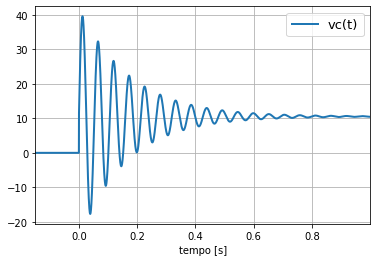

In [21]:
# plota funções no domínio do tempo
# plot vc
intervalo = np.arange(-0.15, 1, 0.00005)
symplot(t, vc, intervalo, 'vc(t)')

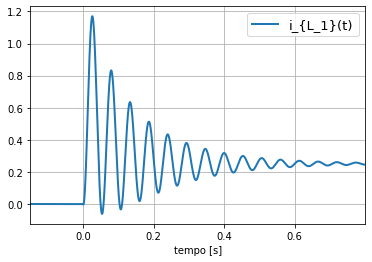

In [22]:
# plota funções no domínio do tempo
# plot IL1
intervalo = np.arange(-0.15, 0.8, 0.00005)
symplot(t, i_l1, intervalo, 'i_{L_1}(t)')

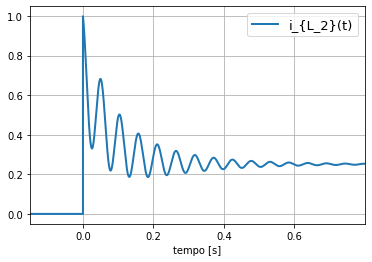

In [23]:
# plota funções no domínio do tempo
# plot IL2
intervalo = np.arange(-0.15, 0.8, 0.00005)
symplot(t, i_l2, intervalo, 'i_{L_2}(t)')

g. Simule o Circuito da figura no falstad e compare as curvas observadas com os resultados obtidos no item d. Compare em termos de valores finais e valores de pico das grandezas.

**Falstad**

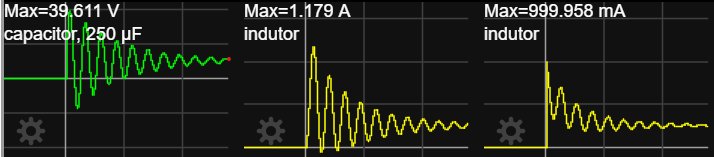

In [79]:
# Valores inicias no dominio do tempo
vc_0_tvi = round(sp.limit(vc, t, 0))
il1_0_tvi = round(sp.limit(i_l1, t, 0))
il2_0_tvi = round(sp.limit(i_l2, t, 0))

# valores finais no dominio do tempo
vc_inf_tvf = sp.limit(vc, t, infty)
il1_inf_tvf = sp.limit(i_l1, t, infty)
il2_inf_tvf = sp.limit(i_l2, t, infty)

print("Valores iniciais com o limite no domínio do tempo.")
symdisp('v_c(0^+) = ', vc_0_tvi, 'V')
symdisp('i_{L_1}(0^+) = ', il1_0_tvi, 'A')
symdisp('i_{L_2}(0^+) = ', il2_0_tvi, 'A')

print("\nValores finais com o limite no domínio do tempo.")
symdisp('v_c(\infty) = ', vc_inf_tvf, 'V')
symdisp('i_{L_1}(\infty) = ', il1_inf_tvf, 'A')
symdisp('i_{L_2}(\infty) = ', il2_inf_tvf, 'A')

Valores iniciais com o limite no domínio do tempo.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Valores finais com o limite no domínio do tempo.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Conclui-se então que os resultados estão sim de acordo, não só pelas comparações dos gráficos gerados, mas também pelos TVIs e TVFs encontrados com as equações no dominio de Laplace (anteriormente) e agora no domínio do tempo.